In [1]:
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [2]:
# Create a Dictionary of series
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Smith','Jack',
   'Lee','David','Gasper','Betina','Andres']),
'Age':pd.Series([25,26,25,23,30,29,23,34,40,30,51,46]),
'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.78,2.98,4.80,4.10,3.65])
}

# Create a DataFrame from the Dictionary
df = pd.DataFrame(d)

In [3]:
# Show basic statistics for the DataFrame
df.describe()

,Age,Rating
count,12.000000,12.000000
mean,31.833333,3.743333
std,9.232682,0.661628
min,23.000000,2.560000
25%,25.000000,3.230000
50%,29.500000,3.790000
75%,35.500000,4.132500
max,51.000000,4.800000


In [23]:
# Import data into Dataframe (Excel format)
# Stock prices for Apple over time
df=pd.read_excel('AAPL.xlsx', index_col=0)

In [24]:
df['Range'] = df['Open'] + df['Close']

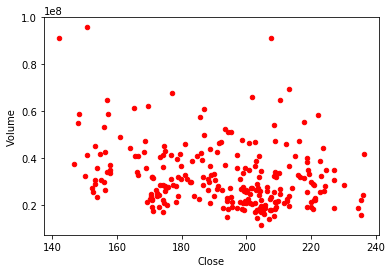

In [29]:
df.plot(kind='scatter',x=('Range'),y='Volume',color='red')
plt.show()

In [13]:
#
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Range
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,192.458651,194.472937,190.545516,192.543532,191.311169,3.184620e+07,385.002182
std,21.389601,21.497294,21.422757,21.427871,21.774619,1.346958e+07,42.747778
min,143.979996,145.720001,142.000000,142.190002,140.505798,1.136200e+07,286.169998
25%,174.872501,175.967499,173.747501,174.832496,173.452965,2.202130e+07,349.117504
50%,196.434998,199.055001,193.930000,197.000000,195.877899,2.830910e+07,393.724998
75%,207.717499,209.260006,205.594994,207.912502,206.560455,3.842225e+07,415.392501
max,236.389999,238.130005,234.880005,236.210007,236.210007,9.574460e+07,471.710006


In [21]:
#calculate mean, mode, median
mean=df.loc[:,"Close"].mean()
mode=df.loc[:,"Close"].mode()
median=df.loc[:,"Close"].median()
print("mean: ",mean)
print("mode: ",mode)
print("median: ",median)

mean:  192.54353178571426
mode:  0    174.240005
1    197.000000
2    207.479996
dtype: float64
median:  197.0


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

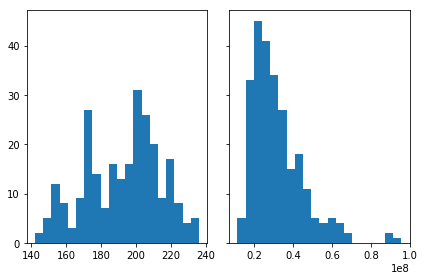

In [14]:
x=df['Close']
y=df['Volume']
n_bins=20

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)
plt.axvline(mean,color='r', linestyle='--')

In [37]:
from scipy.stats import skew 
import numpy as np  
  
print( '\nSkewness for x : ', skew(x)) 
print( '\nSkewness for y : ', skew(y)) 

# skewness = 0 : normally distributed.
# skewness > 0 : more weight in the left tail of the distribution.
# skewness < 0 : more weight in the right tail of the distribution. 


Skewness for x :  -0.2742246891312139

Skewness for y :  1.6622962182831216


In [39]:
from scipy.stats import kurtosis

print( '\nKurtosis for x : ', kurtosis(x)) 
print( '\nKurtosis for y : ', kurtosis(y)) 


Kurtosis for x :  -0.7106889193093284

Kurtosis for y :  4.052938931639995


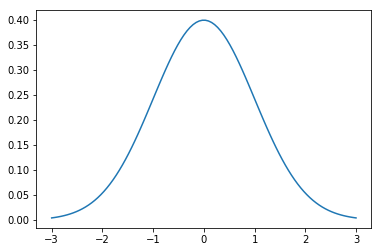

In [28]:
# Plot an Ideal Normal Distribution 
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()